<a href="https://colab.research.google.com/github/hyeonzuu/Machine-Learning-Deep-Learnig-Basic/blob/main/8_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#케라스 합성곱층
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')

In [6]:
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same', strides=1)

In [7]:
keras.layers.MaxPooling2D(2)


### MNIST 데이터 불러오기

In [11]:
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [12]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [14]:
model.add(keras.layers.MaxPooling2D(2))

In [16]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding ='same'))
model.add(keras.layers.MaxPooling2D(2))

In [17]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0

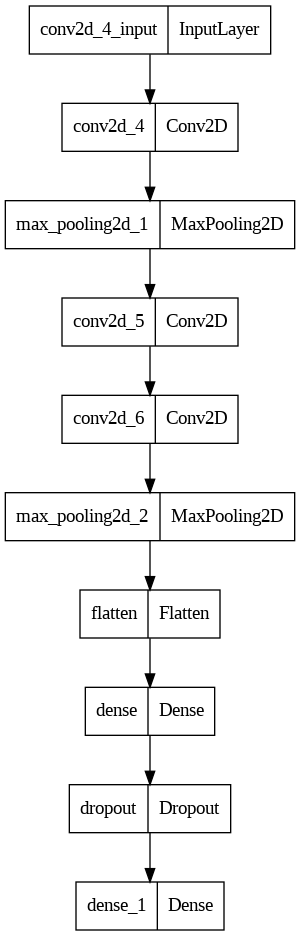

In [19]:
keras.utils.plot_model(model)

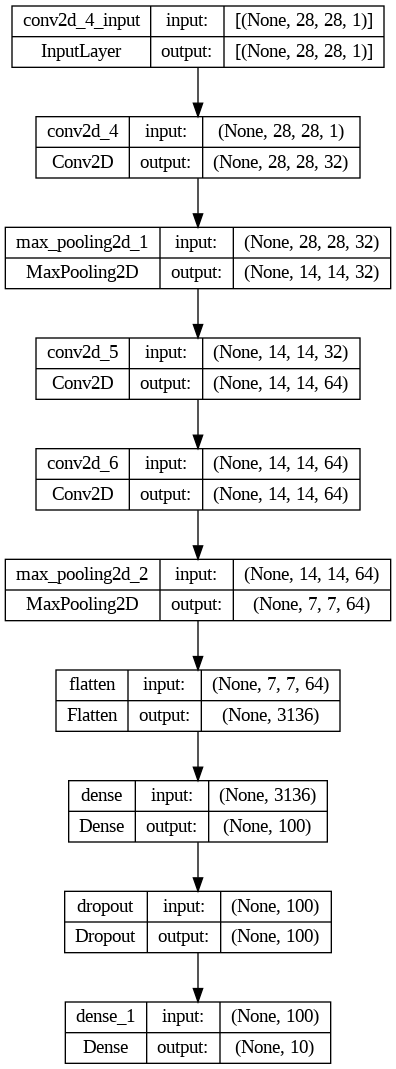

In [21]:
keras.utils.plot_model(model, show_shapes=True)

###모델 컴파일과 훈련

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 129s 85ms/step - loss: 0.4149 - accuracy: 0.8500 - val_loss: 0.2858 - val_accuracy: 0.8945
Epoch 2/20
   2/1500 [..............................] - ETA: 1:41 - loss: 0.3496 - accuracy: 0.8906

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 126s 84ms/step - loss: 0.2594 - accuracy: 0.9055 - val_loss: 0.2569 - val_accuracy: 0.9064
Epoch 3/20
1500/1500 [==============================] - 125s 83ms/step - loss: 0.2146 - accuracy: 0.9205 - val_loss: 0.2306 - val_accuracy: 0.9114
Epoch 4/20
1500/1500 [==============================] - 128s 86ms/step - loss: 0.1846 - accuracy: 0.9311 - val_loss: 0.2152 - val_accuracy: 0.9200
Epoch 5/20
1500/1500 [==============================] - 127s 85ms/step - loss: 0.1581 - accuracy: 0.9410 - val_loss: 0.2214 - val_accuracy: 0.9197
Epoch 6/20
1500/1500 [==============================] - 179s 119ms/step - loss: 0.1301 - accuracy: 0.9500 - val_loss: 0.2234 - val_accuracy: 0.9211


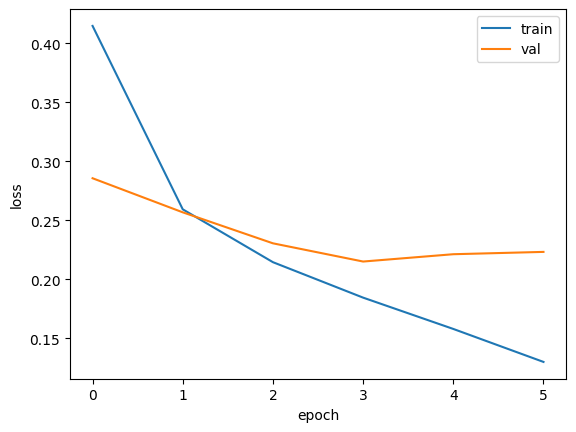

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [31]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 9s 25ms/step - loss: 0.2152 - accuracy: 0.9200


[0.21518222987651825, 0.9200000166893005]

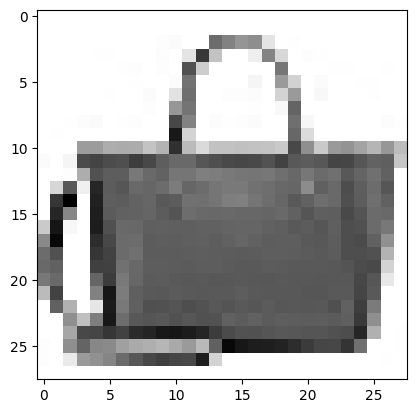

In [33]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [34]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 236ms/step
[[6.1522053e-15 3.8481164e-15 4.4975674e-14 3.9213842e-13 3.4141323e-13
  4.8172312e-14 2.2273336e-13 6.2571537e-14 1.0000000e+00 1.0903666e-14]]


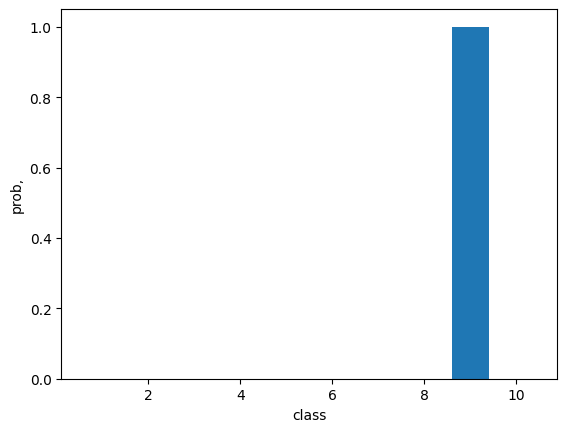

In [35]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob,')
plt.show()

In [36]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [37]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [39]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [40]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 7s 21ms/step - loss: 0.2329 - accuracy: 0.9164


[0.23294594883918762, 0.9164000153541565]

##CNN 시각화

In [44]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [45]:
model.layers

In [46]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [50]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.020076789 0.16034153


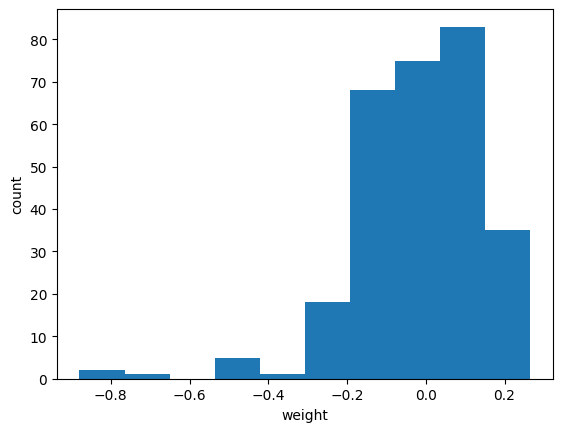

In [51]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

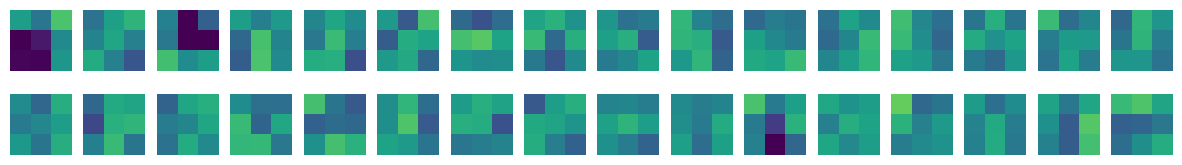

In [53]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [56]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation= 'relu', padding = 'same', input_shape=(28, 28,1)))

In [62]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [63]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0030757673 0.0839572


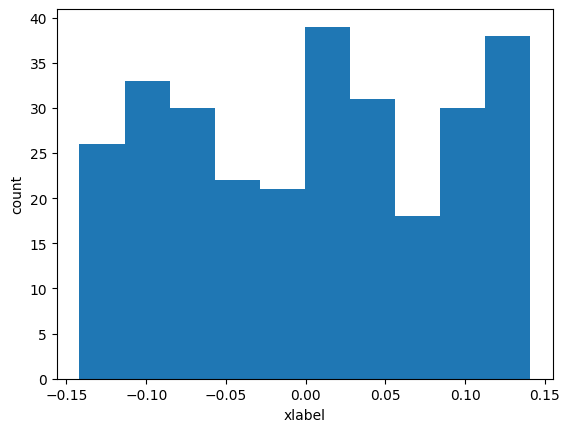

In [64]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('xlabel')
plt.ylabel('count')
plt.show()

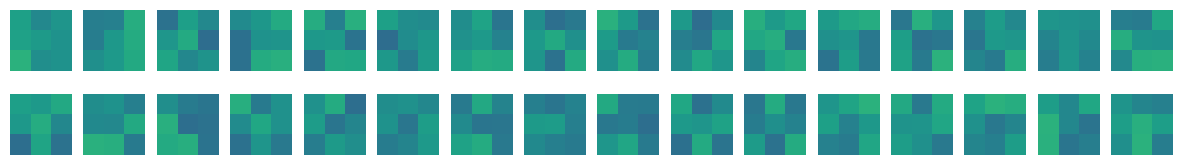

In [66]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()


In [75]:

print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_4_input'), name='conv2d_4_input', description="created by layer 'conv2d_4_input'")


In [76]:
conv_acti = keras.Model(model.input, model.layers[0].output)


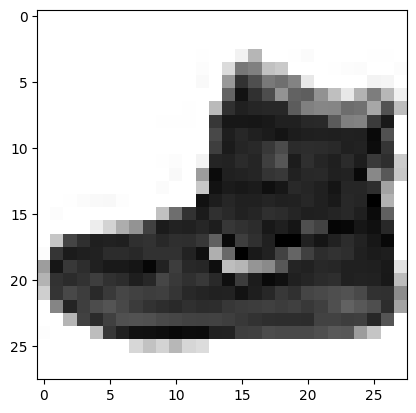

In [77]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [80]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 84ms/step


In [81]:
print(feature_maps.shape)

(1, 28, 28, 32)


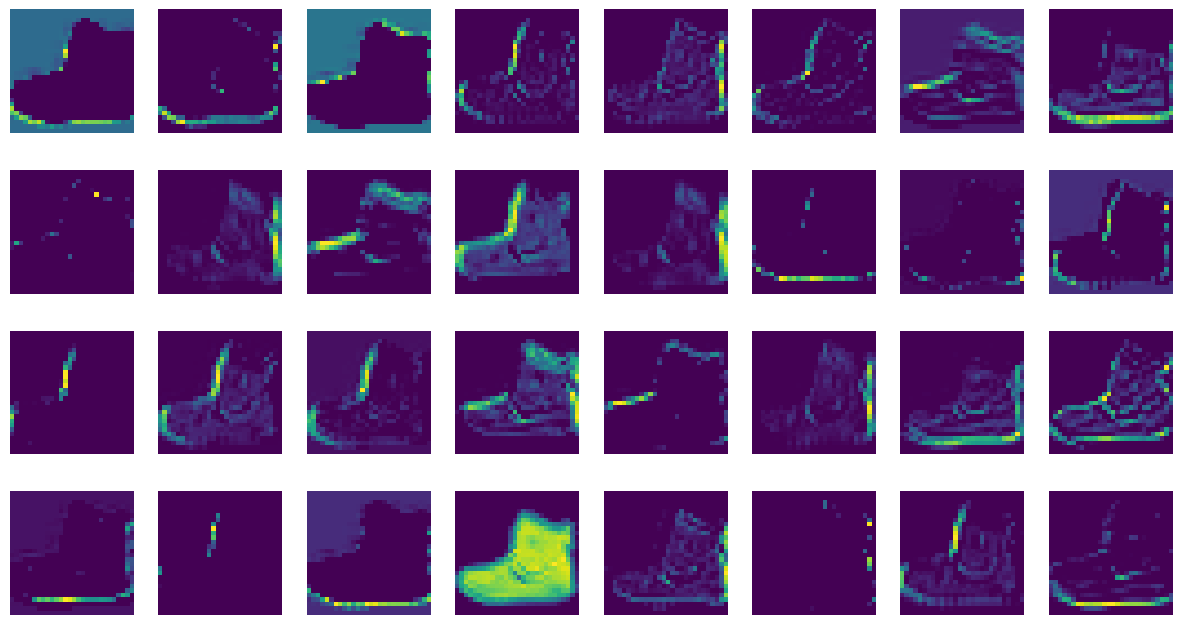

In [82]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [85]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [86]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 70ms/step


In [87]:
print(feature_maps.shape)

(1, 14, 14, 64)


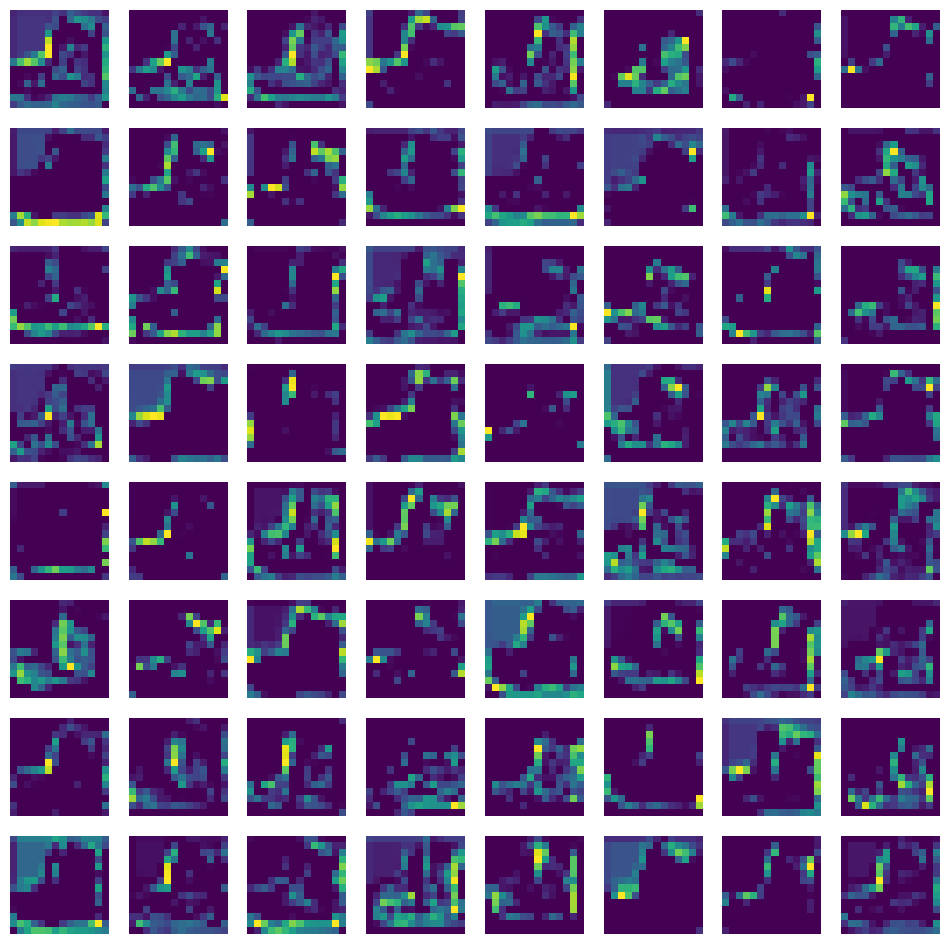

In [88]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()